In [37]:
%load_ext autoreload 
%autoreload 2
import pandas as pd
import os
import matplotlib.pyplot as plt

from mimic_helper_fs import get_ids_with_icd_codes, get_ids_with_kws
from mimic_helper_fs import get_coocurring_symptoms_codes, get_coocurring_symptoms_kws

from ipv_codes import NHAS_IPV_CODES, OREGON_IPV_CODES, USED_IPV_CODES, ICD10_IPV_CODES
from ipv_codes import KW_SETS, CODE_SETS

pd.set_option('max_rows', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', 80)

mimic_iv_ed_data_path = '/home/t-dshanmugam/physionet.org/files/mimic-iv-ed/1.0/ed/'
mimic_iv_data_path = '/home/t-dshanmugam/physionet.org/files/mimiciv/1.0/'
hosp_data_path = mimic_iv_data_path + 'hosp/'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# By ethnicity

In [76]:
triage = pd.read_csv(mimic_iv_ed_data_path + 'triage.csv.gz')
admissions = pd.read_csv(mimic_iv_data_path + 'core/admissions.csv.gz')[['subject_id', 'ethnicity', 
                                                                         'insurance', 'language', 'marital_status']]

triage_admissions = pd.merge(triage, admissions, on='subject_id', how='inner')
triage_admissions = triage_admissions.drop_duplicates()

(array([0.0000e+00, 6.8000e+01, 7.3000e+01, 1.1601e+04, 2.0000e+00,
        3.0000e+01, 3.0000e+00, 0.0000e+00, 7.0000e+00, 6.0000e+00,
        4.5000e+01, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30.]),
 <BarContainer object of 20 artists>)

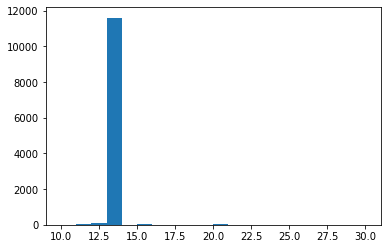

In [88]:
len(triage[triage['pain'] > 10])/len(triage)
plt.hist(triage[triage['pain'] > 10]['pain'],  bins=20, range=(10, 30))

In [91]:
len(triage[triage['pain']  == 13])/len(triage[triage['pain']   > 10])


0.9751197780953181

In [77]:
len(triage_admissions), len(triage), len(triage_patients_in_hospital), len(admissions)

(481760, 448972, 334386, 523740)

In [73]:
triage_subject_ids = set(triage['subject_id'])
hosp_subject_ids = set(admissions['subject_id'])

In [74]:
print("# Patients in Triage: ", len((triage_subject_ids)))
print("# Patients in Hospit:  ", len(hosp_subject_ids))
print("# Patients in Both:  ", len(triage_subject_ids.intersection(hosp_subject_ids)))

# Patients in Triage:  216877
# Patients in Hospit:   256878
# Patients in Both:   129668


In [75]:
len(set(triage_admissions['subject_id']))

129668

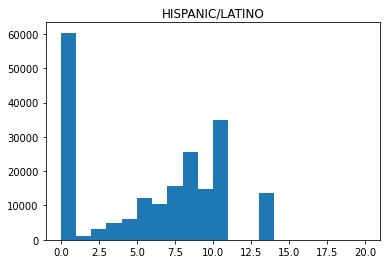

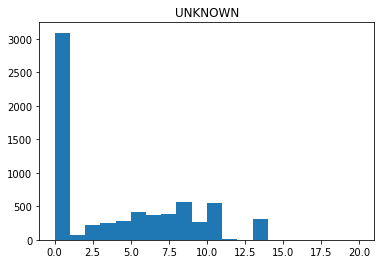

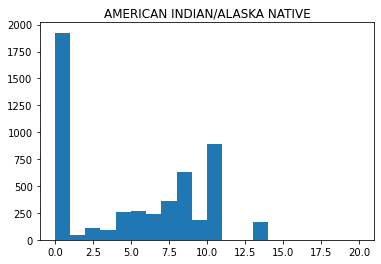

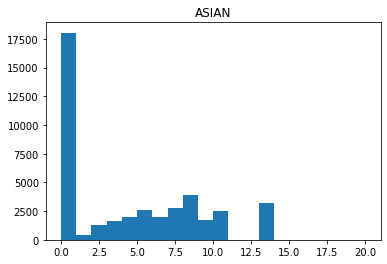

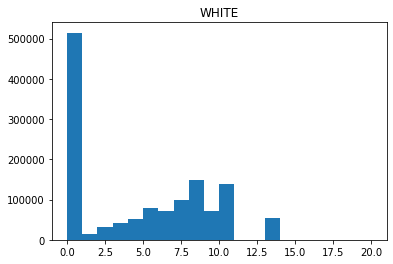

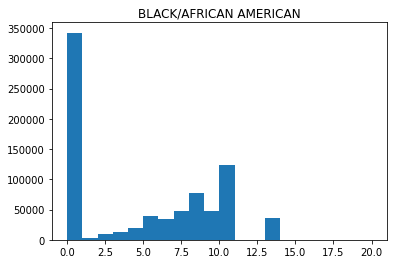

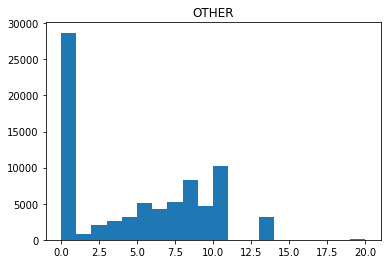

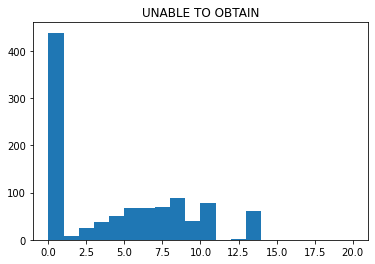

<Figure size 432x288 with 0 Axes>

In [7]:
ethnicities = list(set(triage_admissions['ethnicity']))
for ethnicity in ethnicities:
    plt.hist(triage_admissions[triage_admissions['ethnicity'] == ethnicity]['pain'], range=(0, 20), bins = 20)
    plt.title(ethnicity)
    plt.figure()

In [20]:
dicts = []
extreme_pain_threshold = 15
for ethnicity in ethnicities:
    n_above_twenty = len(triage_admissions[(triage_admissions['ethnicity'] ==  ethnicity) & (triage_admissions['pain'] > extreme_pain_threshold)]['chiefcomplaint'])
    pct_of_group = n_above_twenty/len(triage_admissions[triage_admissions['ethnicity'] == ethnicity])
    dicts.append({'ethnicity': ethnicity, 'count': n_above_twenty, '% of group': pct_of_group})
    
extreme_pain_prevalence_df = pd.DataFrame(dicts)
extreme_pain_prevalence_df

,ethnicity,count,% of group
0,HISPANIC/LATINO,98,0.000452
1,UNKNOWN,0,0.000000
2,AMERICAN INDIAN/ALASKA NATIVE,2,0.000365
3,ASIAN,0,0.000000
4,WHITE,646,0.000460
5,BLACK/AFRICAN AMERICAN,226,0.000264
6,OTHER,61,0.000722
7,UNABLE TO OBTAIN,0,0.000000


# By gender

In [25]:
triage = pd.read_csv(mimic_iv_ed_data_path + 'triage.csv.gz')
patients = pd.read_csv(mimic_iv_data_path + 'core/patients.csv.gz')

triage_patients = pd.merge(triage, patients, on='subject_id', how='inner')

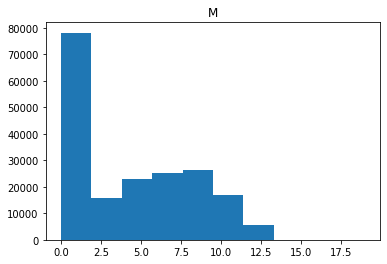

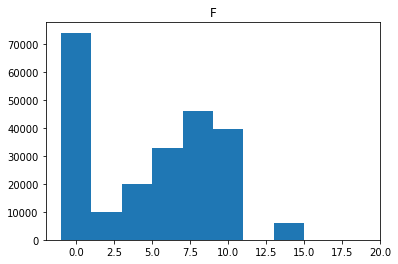

<Figure size 432x288 with 0 Axes>

In [30]:
genders = list(set(triage_patients['gender']))
for gender in genders:
    plt.hist(triage_patients[(triage_patients['gender'] == gender) & (triage_patients['pain'] < 20)]['pain'])
    plt.title(gender)
    plt.figure()

In [36]:
dicts = []
extreme_pain_threshold = 20
for gender in genders:
    n_above_twenty = len(triage_patients[(triage_patients['gender'] ==  gender) & (triage_patients['pain'] > extreme_pain_threshold)])
    pct_of_group = n_above_twenty/len(triage_patients[triage_patients['gender'] == gender])
    dicts.append({'gender': gender, 'count': n_above_twenty, '% of group': pct_of_group})
    
extreme_pain_prevalence_df = pd.DataFrame(dicts)
extreme_pain_prevalence_df

,gender,count,% of group
0,M,26,0.000126
1,F,36,0.000148


# Look at a specific complaint, or ICD code?

# Regressions we discussed , really not carefully reviewed